### Pandas의 시각화 응용 2

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### 데이터 프레임을 읽어 온다:

In [42]:
df = pd.read_csv('./data/data_airquality.csv', header='infer',encoding = 'latin1')

In [43]:
df.shape

(576, 4)

#### 데이터 프레임의 구조를 한눈에 살펴 본다:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pm25       576 non-null    float64
 1   region     576 non-null    object 
 2   longitude  576 non-null    float64
 3   latitude   576 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.1+ KB


#### 데이터 프레임의 상단과 하단:

In [45]:
df.head(10)

,pm25,region,longitude,latitude
0,9.771185,east,-87.748260,30.592781
1,9.993817,east,-85.842858,33.265810
2,10.688618,east,-87.725960,34.731480
3,11.337424,east,-85.798919,34.459133
4,12.119764,east,-86.032125,34.018597
5,10.827805,east,-85.350387,31.189731
6,11.583928,east,-86.828050,33.527872
7,11.261996,east,-86.588226,34.730790
8,9.414423,east,-88.139667,30.722256
9,11.391494,east,-86.918920,34.507018


In [46]:
df.tail(10)

,pm25,region,longitude,latitude
566,11.975980,east,-88.255888,43.036352
567,5.272252,west,-105.496159,44.085797
568,3.382626,west,-105.502721,42.857379
569,8.505596,west,-108.681116,43.098213
570,4.132739,west,-104.762083,41.196199
571,4.955570,west,-108.999016,44.568961
572,6.549239,west,-106.968130,44.783629
573,5.632587,west,-109.991147,42.750949
574,6.349710,west,-109.168198,41.640708
575,4.565808,west,-110.673534,43.612124


#### 데이터 프레임의 컬럼 이름을 header에 저장한다:

In [47]:
header = df.columns
header

Index(['pm25', 'region', 'longitude', 'latitude'], dtype='object')

#### 조건부 슬라이싱 후 통계 메서드를 적용해 본다:

*동부와 서부로 구분하여 관측치의 개수를 정리해 본다*

In [48]:
df2 = df[df.region=='east']
df2.shape

(442, 4)

In [49]:
df3 = df[df.region=='west']
df3.shape[0]

134

In [50]:
{'East':df2.shape[0], 'West':df3.shape[0]}

{'East': 442, 'West': 134}

In [51]:
df4 = pd.DataFrame( {'Counts':[df2.shape[0], df3.shape[0]] }, index=['East','West'])
df4

,Counts
East,442
West,134


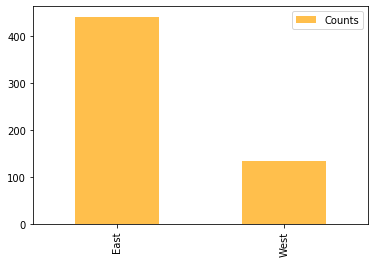

In [52]:
df4.plot.bar(color='orange', alpha=0.7)
plt.show()

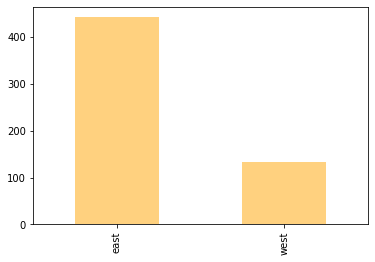

In [53]:
# 더 쉬운 방법.
my_counts = df.region.value_counts()
my_counts.plot.bar(color='orange', alpha=0.5)
plt.show()

#### 시각화를 한다

*히스토그램:*

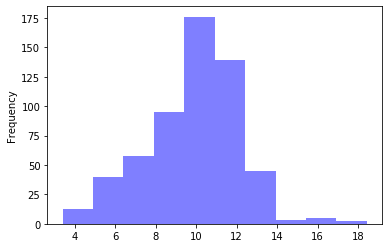

In [62]:
#전체
df.loc[:,'pm25'].plot.hist(color='blue',alpha=0.5)
plt.show()

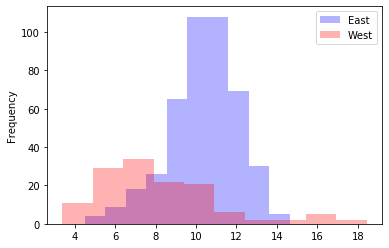

In [55]:
#동부, 서부 구분
df2.loc[:,'pm25'].plot.hist(color='blue',alpha=0.3,label='East')
df3.loc[:,'pm25'].plot.hist(color='red',alpha=0.3, label = 'West')
plt.legend()
plt.show()

*산점도:*

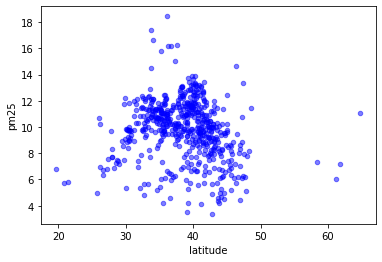

In [56]:
#전체
df.plot.scatter(x='latitude', y='pm25',color='blue',alpha=0.5,marker='o',s=20)
plt.show()

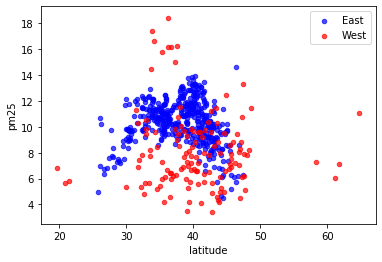

In [57]:
#동부, 서부 구분
base=df2.plot.scatter(x='latitude', y='pm25',color='blue',alpha=0.7,marker='o',s=20, label='East')
df3.plot.scatter(x='latitude', y='pm25',color='red',alpha=0.7,marker='o',s=20, label='West',ax=base)
plt.show()

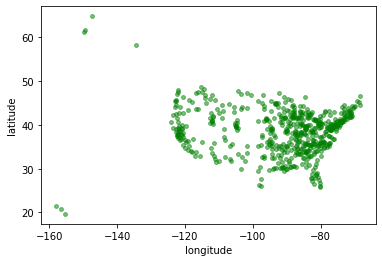

In [58]:
# 경도, 위도 변수 사용.
df.plot.scatter(x='longitude', y='latitude', color='green',alpha=0.5,marker='o',s=15)
plt.show()

*산점도 행렬*

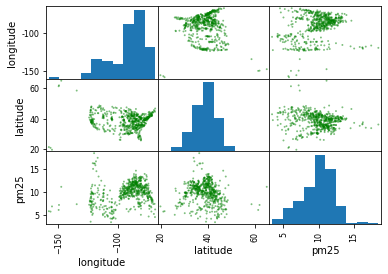

In [59]:
pd.plotting.scatter_matrix(df[['longitude','latitude','pm25']],c='green',marker='.',s=15)
plt.show()